<a href="https://colab.research.google.com/github/KaitoAMANO/EU_M_Math/blob/main/Chap09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import sklearn


<function matplotlib.pyplot.show(close=None, block=None)>

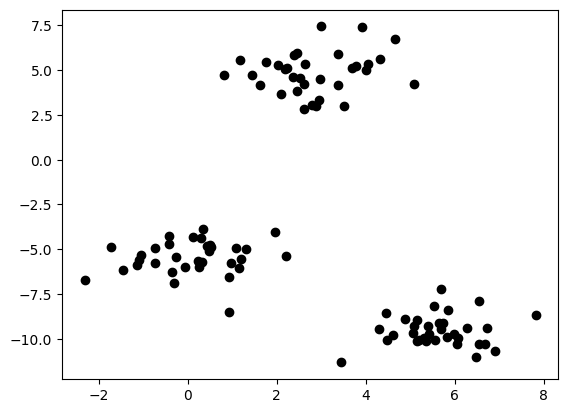

In [ ]:
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

X, _ = make_blobs(random_state=10)
plt.scatter(X[:, 0], X[:, 1], color='black')
plt.show

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


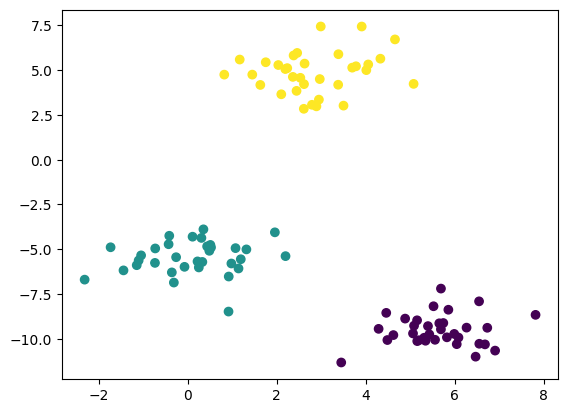

In [ ]:
kmeans = KMeans(init='random', n_clusters=3)
kmeans.fit(X)

y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')

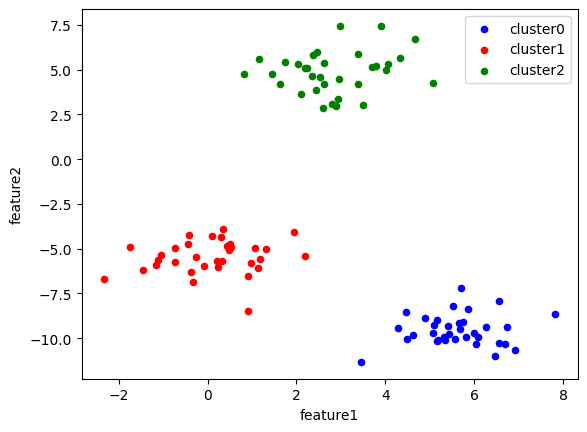

In [ ]:
merge_data = pd.concat([pd.DataFrame(X[:, 0]), pd.DataFrame(X[:, 1]), pd.DataFrame(y_pred)], axis=1)
merge_data.columns = ['feature1', 'feature2', 'cluster']

ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i], label=f'cluster{i}', ax=ax)

In [ ]:
import requests, zipfile, io

zip_file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
bank = pd.read_csv('bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
print(f'データ形式(x, y);{bank.shape}')
print(f'欠損データの数:{bank.isnull().sum().sum()}')

データ形式(x, y);(45211, 17)
欠損データの数:0


In [ ]:
from sklearn.preprocessing  import StandardScaler

bank_sub = bank[['age', 'balance', 'duration', 'campaign', 'previous']]
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   duration  45211 non-null  int64
 3   campaign  45211 non-null  int64
 4   previous  45211 non-null  int64
dtypes: int64(5)
memory usage: 1.7 MB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster_number
0    14382
4    23242
5     1058
2     3891
1     1638
3     1000
Name: count, dtype: int64


Text(0, 0.5, 'count')

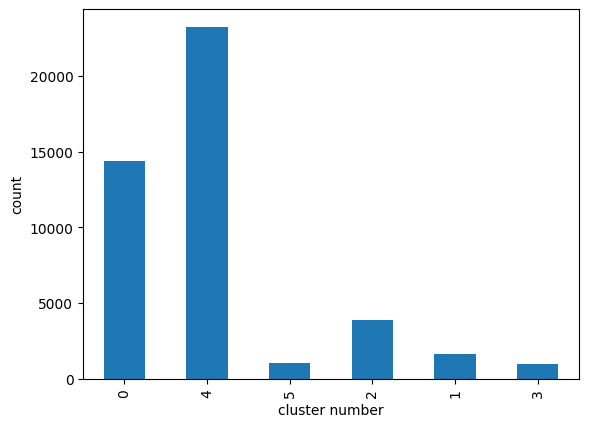

In [ ]:
kmeans = KMeans(init='random', n_clusters=6, random_state=0)
kmeans.fit(bank_sub_std)

labels = pd.Series(kmeans.labels_, name='cluster_number')
print(labels.value_counts(sort=False))

ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

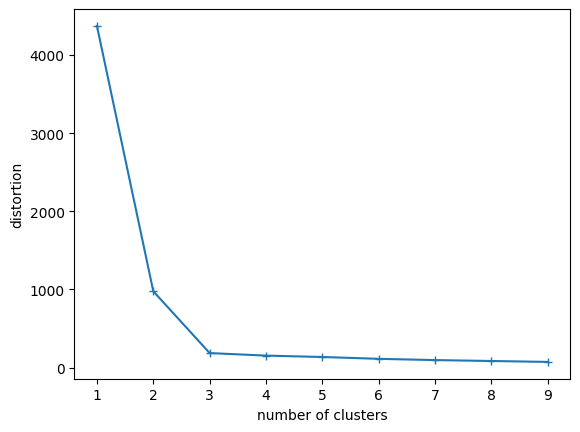

In [ ]:
dist_list = []
for i in range(1, 10):
    kmeans = KMeans(init='random', n_clusters=i, random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)

plt.plot(range(1, 10), dist_list, marker='+')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

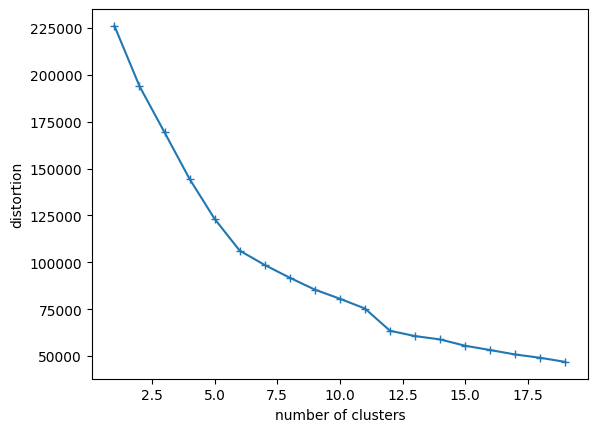

In [ ]:
dist_list = []
for i in range(1, 20):
    kmeans = KMeans(init='random', n_clusters=i, random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)

plt.plot(range(1, 20), dist_list, marker='+')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show

In [ ]:
bank_with_cluster = pd.concat([bank, labels], axis=1)
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,4
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,4


In [ ]:
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 100]

qcut_age = pd.cut(bank_with_cluster.age, bins, right=False)
df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis=1)

cross_cluster_age = df.groupby(['cluster_number', 'age']).size().unstack().fillna(0)
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,0,0,0,0,0,1125,4566,3804,3360,827,700
1,2,14,140,380,339,262,213,149,110,24,5
2,0,59,410,810,836,641,462,327,254,50,42
3,0,18,98,222,211,130,97,95,67,30,32
4,45,665,3751,8135,6789,3857,0,0,0,0,0
5,0,6,65,193,174,170,132,113,131,43,31


In [ ]:
hist_age = pd.value_counts(qcut_age)
hist_age

age
[30, 35)     9740
[35, 40)     8349
[40, 45)     6185
[45, 50)     5470
[50, 55)     4488
[25, 30)     4464
[55, 60)     3922
[60, 65)      974
[65, 100)     810
[20, 25)      762
[15, 20)       47
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='cluster_number'>

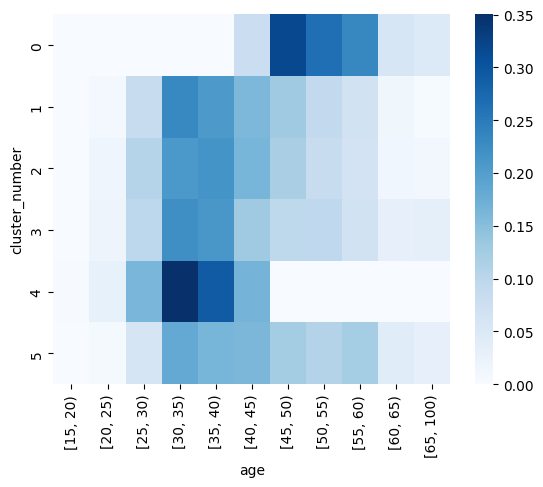

In [ ]:
sns.heatmap(cross_cluster_age.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')

In [ ]:
cross_custer_job = bank_with_cluster.groupby(['cluster_number', 'job']).size().unstack().fillna(0)
cross_custer_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,1418,2925,534,642,2762,1929,484,1085,4,2029,409,161
1,166,362,62,38,376,34,62,149,18,321,29,21
2,382,944,132,99,815,139,153,357,65,637,150,18
3,145,170,29,16,234,48,28,84,41,180,23,2
4,2964,5196,685,412,4923,53,790,2424,792,4272,655,76
5,96,135,45,33,348,61,62,55,18,158,37,10


<Axes: xlabel='job', ylabel='cluster_number'>

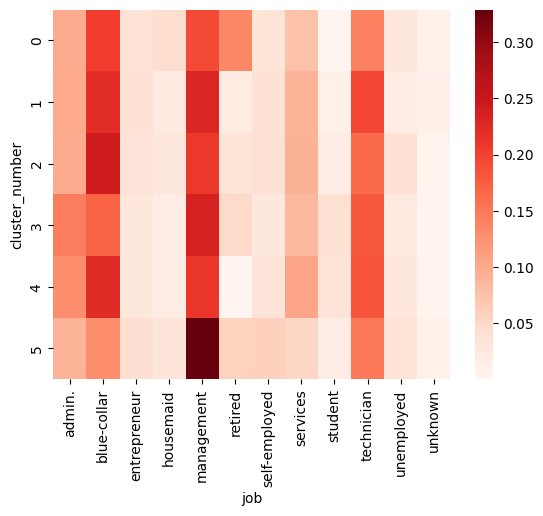

In [ ]:
sns.heatmap(cross_custer_job.apply(lambda x : x/x.sum(), axis=1), cmap='Reds')

相関関数0.889


<function matplotlib.pyplot.show(close=None, block=None)>

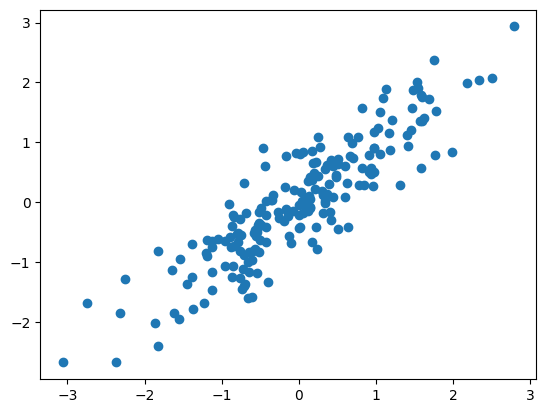

In [ ]:
from sklearn.preprocessing import StandardScaler

sample = np.random.RandomState(1)

X = np.dot(sample.rand(2, 2), sample.randn(2, 200)).T
sc = StandardScaler()
X_std = sc.fit_transform(X)

print(f'相関関数{sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]:.3f}')
plt.scatter(X_std[:, 0], X_std[:, 1])
plt.show

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_std)


PCA(n_components=2)

In [ ]:
print(pca.components_)


[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [ ]:
print(f'各主成分の分散:{pca.explained_variance_ratio_}')

各主成分の分散:[0.94469498 0.05530502]


<function matplotlib.pyplot.show(close=None, block=None)>

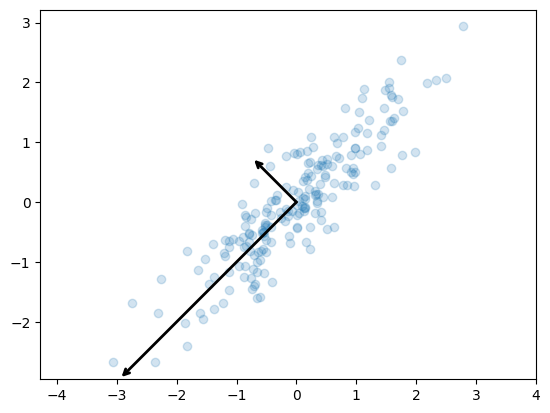

In [ ]:
arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)

def draw_vector(v0, v1):
  plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

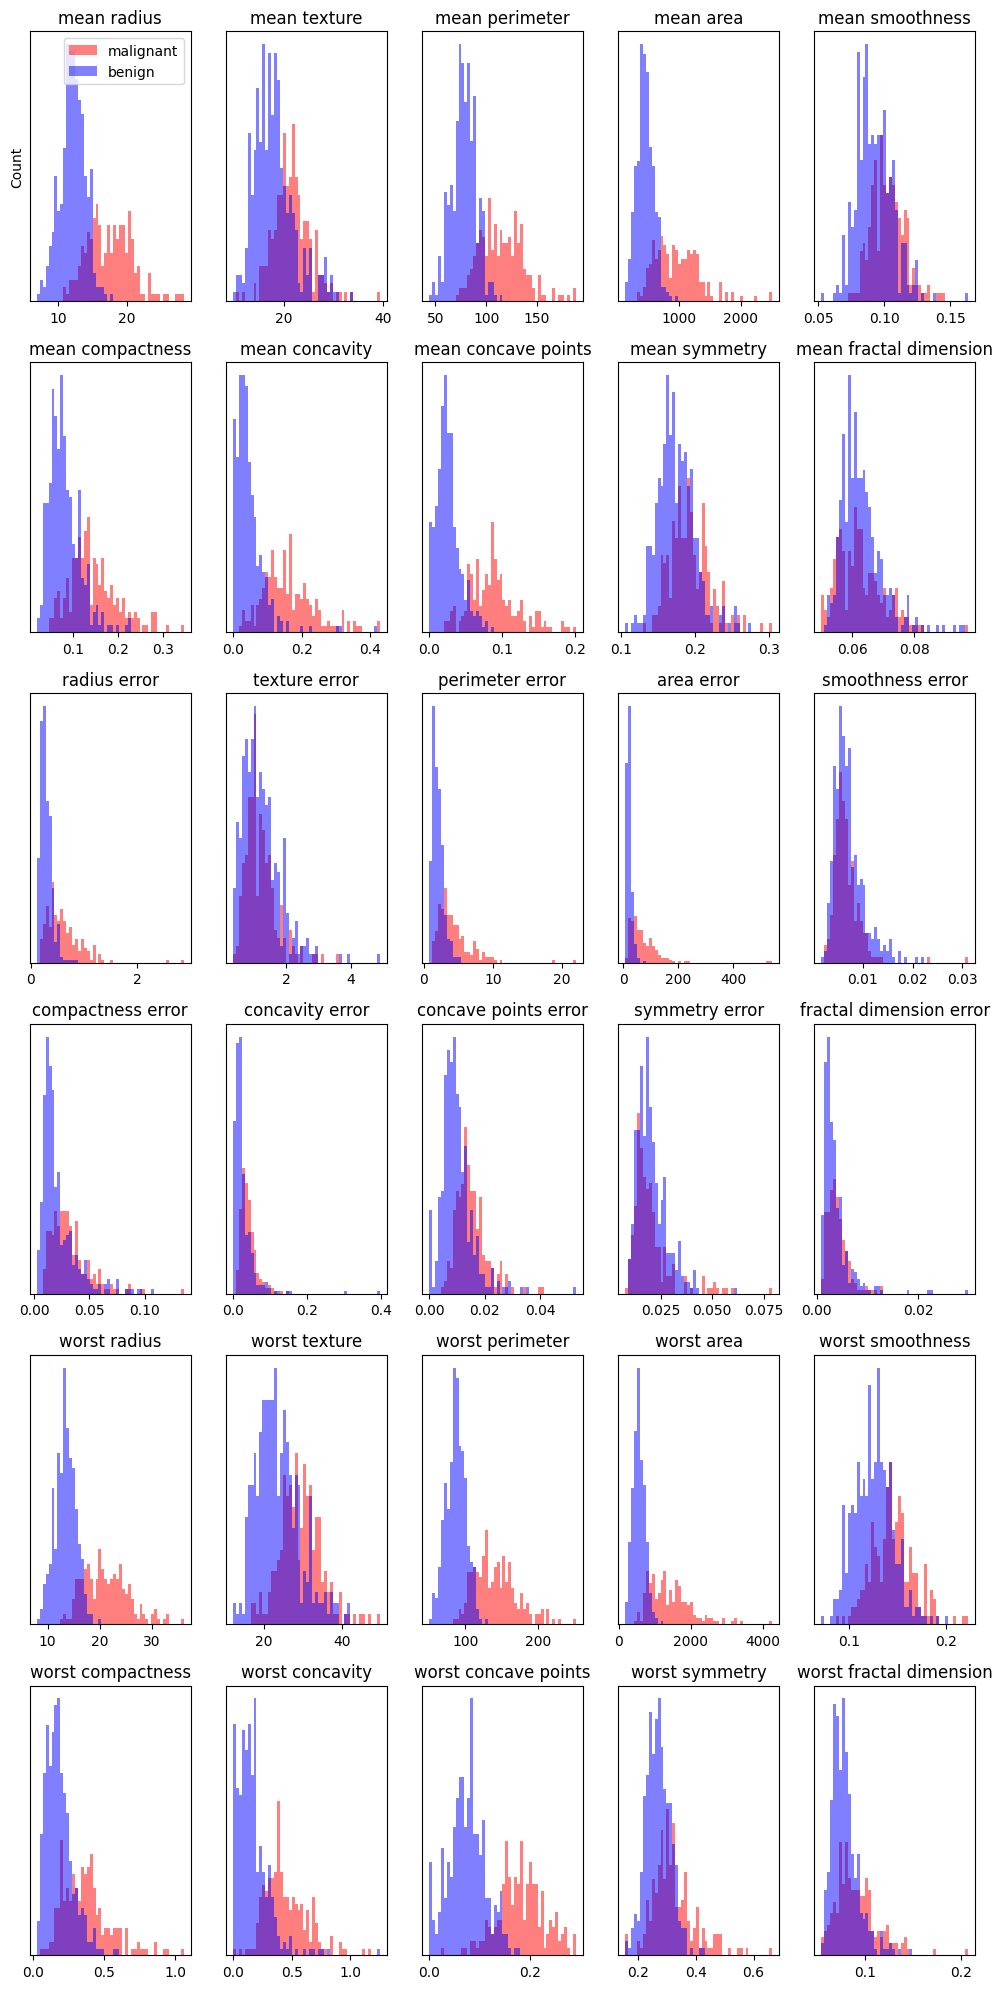

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

fig, axes = plt.subplots(6, 5, figsize=(10, 20))
ax = axes.ravel()

for i in range(30):
  _, bins = np.histogram(cancer.data[:, i], bins=50)
  ax[i].hist(malignant[:, i], bins=bins, color='red', alpha=0.5)
  ax[i].hist(benign[:, i], bins=bins, color='blue', alpha=0.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())

ax[0].set_ylabel('Count')
ax[0].legend(['malignant', 'benign'], loc='best')

fig.tight_layout()
plt.show

In [ ]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print(f'X_pca shape:{X_pca.shape}')
print(f'Explaned variance ratio:{pca.explained_variance_ratio_}')

X_pca shape:(569, 2)
Explaned variance ratio:[0.44272026 0.18971182]


In [ ]:
X_pca = pd.DataFrame(X_pca, columns=['pc1', 'pc2'])

X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)

pca_malignant = X_pca[X_pca.target == 0]
pca_benign = X_pca[X_pca.target == 1]

<Axes: xlabel='pc1', ylabel='pc2'>

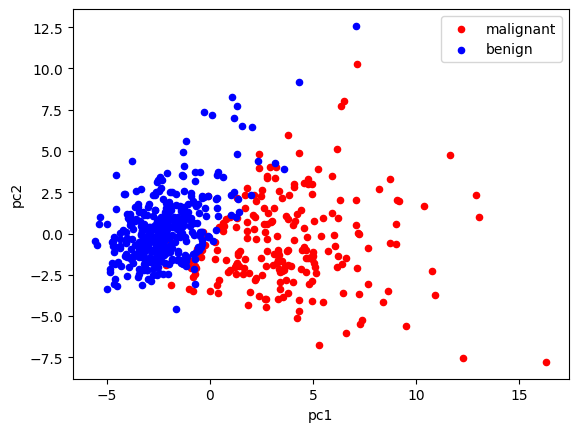

In [ ]:
ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant')
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

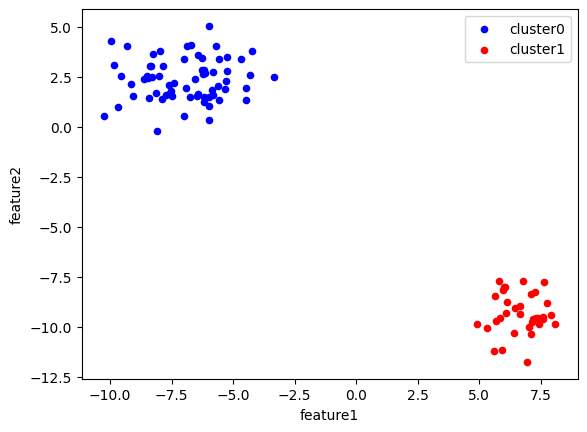

In [ ]:
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

X, _ = make_blobs(random_state=52)

kmeans = KMeans(init='random', n_clusters=2)
kmeans.fit(X)

y_pred = kmeans.predict(X)

merge_data = pd.concat([pd.DataFrame(X[:, 0]), pd.DataFrame(X[:, 1]), pd.DataFrame(y_pred)], axis=1)
merge_data.columns = ['feature1', 'feature2', 'cluster']

ax = None
colors = ['blue', 'red']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i], label=f'cluster{i}', ax=ax)

plt.show

X_pca shape:(150, 2)
iris_data shape:(150, 4)


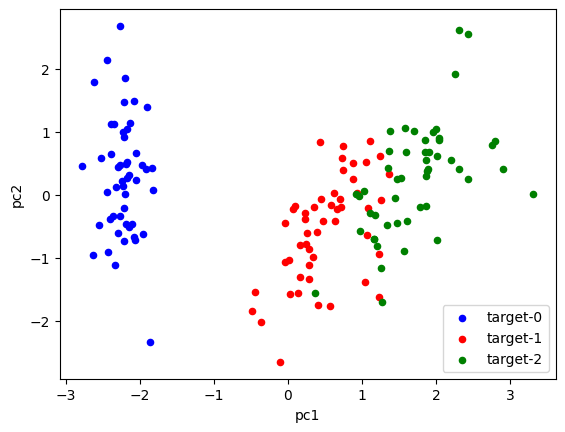

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

sc = StandardScaler()
sc.fit(iris.data)
X_std = sc.fit_transform(iris.data)

pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print(f'X_pca shape:{X_pca.shape}')
print(f'iris_data shape:{iris.data.shape}')

merge_data = pd.concat([pd.DataFrame(X_pca[:, 0]), pd.DataFrame(X_pca[:, 1]), pd.DataFrame(iris.target)], axis=1)
merge_data.columns = ['pc1', 'pc2', 'target']

ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('target'):
    ax = data.plot.scatter(x='pc1', y='pc2', color=colors[i], label=f'target-{i}', ax=ax)